Bellow is a serie of code to first pull the "Real Property Sales" zipped data from the King County website. Then the code instructs it to unzip the file, followed by saving it to the dataframe rpsdf.

In [164]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder


In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip

In [ ]:
! unzip -o ../../data/raw/Real_Property_Sales

In [29]:
#rps = real property sales
rpsdf = pd.read_csv("../../data/raw/EXTR_RPSale.csv", encoding='latin-1')

In [ ]:
rpsdf.head()

Bellow is a serie of code to first pull the "Parcel" zipped data from the King County website. Then the code instructs it to unzip the file, followed by saving it to the dataframe parceldf.

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip

In [ ]:
! unzip -o ../../data/raw/parcel

In [26]:
parceldf = pd.read_csv("../../data/raw/EXTR_Parcel.csv", encoding='latin-1')

In [ ]:
parceldf.head()

Bellow is a serie of code to first pull the "Residential Building" zipped data from the King County website. Then the code instructs it to unzip the file, followed by saving it to the dataframe rbdf.

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip

In [ ]:
! unzip -o ../../data/raw/Residential_Building

In [28]:
rbdf = pd.read_csv("../../data/raw/EXTR_ResBldg.csv", encoding='latin-1')

In [ ]:
rbdf.head()

Bellow pulls the table Lookup, which helps explain our data. Then unzips the file, and saves it as a dataframe, lookupdf.

In [ ]:
! wget -P ../../data/raw https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip

In [ ]:
! unzip -o ../../data/raw/Lookup

In [168]:
lookupdf = pd.read_csv("../../data/raw/EXTR_LookUp.csv")

In [ ]:
lookupdf.head()

In [169]:
def lookup(colvalue):
    return lookupdf.loc[(lookupdf.LUType == colvalue)]

We currently have 4 DataFrames:
rpsdf - Real Sales Price 
parceldf - Parcel
rbdf - Residential Buildings
lookupdf - LookUp

In [ ]:
rpsdf["Minor"].value_counts()

In [ ]:
rpsdf.info()

In [ ]:
rpsdf.head()

In [11]:
rbdf["PIN"] = rbdf["Major"].astype(str)+rbdf["Minor"].astype(str)

In [12]:
rpsdf["PIN"] = rpsdf["Major"].astype(str)+rpsdf["Minor"].astype(str)

In [13]:
parceldf["PIN"] = parceldf["Major"].astype(str)+parceldf["Minor"].astype(str)

Combines Residental Building with Parcel Record to form a new table.

In [14]:
com_df = pd.merge(rbdf,
                 parceldf,
                 on="PIN")
com_df.columns

Index(['Major_x', 'Minor_x', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName',
       'StreetType',
       ...
       'SeismicHazard', 'LandslideHazard', 'SteepSlopeHazard', 'Stream',
       'Wetland', 'SpeciesOfConcern', 'SensitiveAreaTract', 'WaterProblems',
       'TranspConcurrency', 'OtherProblems'],
      dtype='object', length=132)

We need to add 0s in front of each major and minor so that the major are a 9 characters long.

In [ ]:
def minor_pad (df):
    df["Minor"] = df["Minor"].apply(lambda x: f"{df.Minor[x]:04}")
    return series

In [ ]:
def major_pad (df):
    df["Major"] = df["Major"].apply(lambda x: f"{df.Major[x]:06}")
    return series

In [ ]:
def pad (series):
    series["Major"] = series["Major"].apply(lambda x: f"{series.Major[x]:06}")
    series["Minor"] = series["Minor"].apply(lambda x: f"{series.Minor[x]:04}")
    return series

Higher square footage increases home sale price

We need to find the Sale Price which is in Real Property Sale

We need to establish what we mean by square footage: 
Is it a combination of room square footage infomation from Residential Building
OR 
Is it Lot Square Footage from Parcel

We then need to combine Real Property Sale with either Residential Building or Parcel
We then need to graph this infomation

In [17]:
rpsdf.loc[(rpsdf.PrincipalUse== 4)]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
42,2206836,300,101,05/09/2006,321000,20060515002154,,,,,...,4,3,N,N,N,N,1,8,,300101
264,1432152,917960,1865,05/15/1995,0,199506080826,003,097,917960,P,...,4,15,N,N,N,N,10,2,32 38 51,9179601865
637,1301377,202304,9494,03/25/1993,55000,199304071001,000,000,000000,,...,4,15,N,N,N,N,8,2,12,2023049494
753,2788184,122000,1125,01/20/2016,0,20160401000774,,,,,...,4,15,N,N,N,N,18,2,11 18 31,1220001125
982,2087158,276760,2125,11/27/2004,0,20041201000142,,,,,...,4,15,N,N,N,N,18,2,18 31 51,2767602125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107699,1812700,95200,4005,04/18/2001,675000,20010420001131,,,,,...,4,3,N,N,N,N,1,2,45,952004005
2107700,1812700,95200,4015,04/18/2001,675000,20010420001131,,,,,...,4,3,N,N,N,N,1,2,45,952004015
2107702,1652223,197020,44,11/24/1998,609500,199811251313,007,034,195970,P,...,4,3,N,N,N,N,1,0,1,19702044
2107947,1734041,789980,800,01/26/2000,389400,20000131000617,,,,,...,4,3,N,N,N,N,1,2,1,789980800


In [23]:
rbdf.loc[(rbdf.PIN == "300101")]

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
117961,300,101,1,2,13607 52ND PL S 98168,13607,,,52ND,PL,...,0,0,1926,0,0,0,0,3,0,300101


In [22]:
parceldf.loc[(parceldf.PIN == "300101")]

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,PIN
316931,300,101,,FOSTER STEPHEN # 38,POR,,4,23,14,SW,...,N,N,N,N,N,N,N,N,N,300101


A house sale is if the Sale Reason is none, becuase we beleive at 10pm CT monday night, that Sale Reason is the Sale Reason if there was a forced sale. For example a court orded sale would be a forced sale. If no ones arms were twisted to sell the house the reason would be "none"

Deciding what a "house" is on the real property sales table.

Join the tables.

*What to do with NANs/0s anything that would skew our data.

Build graph.

In [ ]:
com_df = pd.merge(rbdf,
                 parceldf,
                 on="PIN")
com_df.columns

duplex = Number of living units = 2 AND PropType = R | lookup(103)

Square Footage = square feet living total

Having a porch = square feet encolsed porch > 0 

home sales price = sales price

beachfront or lakefront =

houses with larger house vs garden ratio = lot square foot - house sqaure foot
house diameter = sqft 1st floor + sq ft porch(both) + sq ft garage attached, sq ft deck

The cost per square foot = 

single family home = living units = 1 AND PropType = R | lookup(103)

Nuisance (power lines, traffic noise, airport noise) = traffic noise + airport noise + power lines + other nuisances

Higher square footage increases home sale price1, 2
Having a porch increases home sale price3, 4
Having a beachfront or lakefront increases home sale price5
The house filling a higher proportion of the overall lot decreases home sale price6
The cost per square foot is lower in duplexes than in single-family homes7
The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price1, 5

Heatmap for combined table

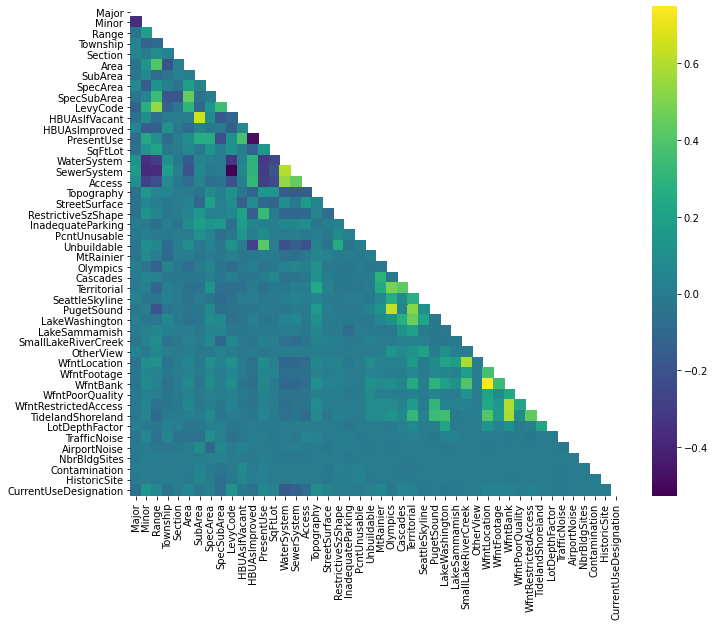

In [39]:
corr = parceldf.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

Rename Columns for graph reasons:

In [40]:
#df = df.rename(columns={
    'Life expectancy ': 'Life_Expectancy',
    'ExciseTaxNbr', : 'Excise_Tax_Number'
    'DocumentDate', : 'Docuement_Date'
    'SalePrice', : 'Sale_Price'
    'PropertyType',: 'Property_Type_RPS'
    'PrincipalUse', : 'Principal_Use_of_Property'
    'SaleInstrument', : 'Sale_Instrument'
    'AFHistoricProperty',: 'Is_Historic_Property'
    'SaleReason': 'Sales_Reason'
    'PropName',: 'Property_Name'
    'PropType',: 'Property_Type_Parcel'
    'PresentUse',: 'Present_Use'
    'SqFtLot',: 'Square_Foot_of_Lot'
    'WfntLocation', : 'Is_Waterfront_Location'
    'TrafficNoise', : 'Traffic_Noise'
    'AirportNoise', : 'Airport_Noise'
    'PowerLines', : 'Power_Lines'
    'OtherNuisances', : 'Other_Nuisances'
    'NbrLivingUnits', : 'Number_of_Living_Units'
    'ZipCode', : 'Zip_Code'
    'SqFt1stFloor', : 'Square_Foot_of_1st_Floor'
    'SqFt2ndFloor', : 'Square_Foot_of_2nd_Floor'
    'SqFtUpperFloor', : 'Square_Foot_of_UpperFloor'
    'SqFtUnfinFull', : 'Square_Foot_Total_Unfinished'
    'SqFtTotLiving', : 'Square_Foot_of_Total_Living'
    'SqFtTotBasement', : 'Square_Foot_of_Total_Basement'
    'SqFtFinBasement', : 'Square_Foot_of_Finished_Basement'
    'SqFtGarageBasement', : 'Square_Foot_of_Garage_Basement'
    'SqFtGarageAttached', : 'Square_Foot_of_Attached_Garage'
    'SqFtOpenPorch', : 'Square_Foot_of_Open_Porch'
    'SqFtEnclosedPorch', : 'Square_Foot_of_Encolsed_Porch'
    'SqFtDeck', : 'Square_Foot_of_Deck'
    'Bedrooms', : 'Bedroom_Count'
    'BathHalfCount', : 'Half_Bathroom_Count'
    'BathFullCount' : 'Full_Bathroom_Count'
}]

IndentationError: unexpected indent (<ipython-input-40-104382d48946>, line 2)

In [57]:
#Model to give us a simple model saves it as fsm_results and returns the summary
def fsm (df, Independent, Dependent):
    fsm = ols(formula="dep ~ indep", data=df)
    fsm_results = fsm.fit()
    return fsm_results.summary()

In [58]:
fsm (parceldf, parceldf.Major, parceldf.Minor)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dep   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                 9.061e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:58:45   Log-Likelihood:            -5.8053e+06
No. Observations:              616110   AIC:                         1.161e+07
Df Residuals:                  616108   BIC:                         1.161e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3684.8767      6.958    529.569      0.000    3671.239    3698.515
indep         -0.0040   1.33e-05   -301.013      0.000      -0.004      -0.004
==============================================================================
Omnibus:                    94748.874   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146477.802
Skew:                           1.190   Prob(JB):                         0.00
Kurtosis:                       3.206   Cond. No.                     9.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Cohen's D function for effect size

In [60]:
def cohen_d (sample1, sample2):
    diff = sample1.mean() - sample2.mean()
    n1 = len(sample1)
    n2 = len(sample2)
    var1 = sample1.var(ddof=1)
    var2 = sample2.var(ddof=1)
    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1+n2-2)
    d = diff/np.sqrt(pooled_var)
    return d

Statistical significance functions:

ttest_lside_1samp: built, need to check Null/Alt language is correct

ttest_rside_1samp: works

ttest_2side_1samp: works

ttest_lside_2samp: built, need to check Null/Alt language is correct

ttest_rside_2samp: works, does it need welch's?

ttest_2side_2samp: works, havent tested welch's?

z_test: broken, test statistic returning wrong number UPDATE: may not be broken sample from phase 2 review may have wrong n value -> 45 in sample but n is listed as 40. ASK A PROFF


In [8]:
def ttest_lside_1samp(alpha, sample, pop_mean):
    a = alpha
    dof = 1-len(sample)
    ci = 1-a
    critical_stat=stats.t.ppf(ci, dof)
    stat, pvalue = stats.ttest_1samp(sample, pop_mean)                                                 
    true_p=pvalue/2
    if true_p < a:
        print(f"Our P-Value of -{true_p} is greater than our Alpha of -{a}, so we reject null hypothesis")
    else:
        print(f"Our P-Value of -{true_p} is less than or equal to our Alpha of -{a}, so we fail to reject null hypothesis") 

In [9]:
bank2 = "128 127 118 115 144 142 133 140 132 131 111 132 149 122 139 119 136 129 126 128".split(' ')
sample = np.array(bank2, int)
ttest_lside_1samp(.05, sample, 120)

Our P-Value of -0.00011919031815483877 is less than our Alpha of -0.05, so we reject null hypothesis


In [76]:
def ttest_rside_1samp(alpha, sample, pop_mean):
    a = alpha
    dof = 1-len(sample)
    ci = 1-a
    critical_stat = stats.t.ppf(ci, dof)
    stat, pvalue = stats.ttest_1samp(sample, pop_mean)                                                 
    true_p=pvalue/2
    if true_p < a:
        print(f"Our P-Value of {true_p} is less than our Alpha of {a}, so we reject null hypothesis")
    else:
        print(f"Our P-Value of {true_p} is greater than or equal to our Alpha of {a}, so we fail to reject null hypothesis")

In [77]:
bank2 = "128 127 118 115 144 142 133 140 132 131 111 132 149 122 139 119 136 129 126 128".split(' ')
sample = np.array(bank2, int)
ttest_rside_1samp(.05, sample, 120)

Our P-Value of 0.00011919031815483877 is less than our Alpha of 0.05, so we reject null hypothesis


In [112]:
def ttest_2side_1samp(alpha, sample, pop_mean):
    stat, pvalue = stats.ttest_1samp(a=sample, popmean=pop_mean)
    if pvalue < alpha:
        print(f"Our P-Value of {pvalue} is less than our Alpha of {alpha}, so we reject null hypothesis")
    else:
        print(f"Our P-Value of {pvalue} is greater than or equal to our Alpha of {alpha}, so we fail to reject null hypothesis")

In [113]:
samp = "30 28 32 26 33 25 28 30".split(' ')
samp = np.array(samp, int)
ttest_2side_1samp(.05, samp, 31)

Our P-Value of 0.0811068697473857 is greater than or equal to our Alpha of 0.05, so we fail to reject null hypothesis


In [11]:
def ttest_lside_2samp(alpha, sample1, sample2):
    
    a = alpha
    s1_mean = np.mean(sample1)
    s2_mean = np.mean(sample2)
    s1_var = np.var(sample1)
    s2_var = np.var(sample2)
    
    #determines welch's t or not
    if s1_var == s2_var:
        statistics, pvalue = stats.ttest_ind(sample1, sample2, equal_var=False)
    else:
        statistics, pvalue = stats.ttest_ind(sample1, sample2, equal_var=True)
        
    #determines statistical significance
    true_p = pvalue/2
    if true_p < a:
        print(f"Our P-Value of -{true_p} is greater than our Alpha of -{a}, so we reject null hypothesis")
    else:
        print(f"Our P-Value of -{true_p} is less than or equal to our Alpha of -{a}, so we fail to reject null hypothesis")

In [13]:
samp1 = "19.7475 19.8387 12.6873 17.6973 19.0878 30.5562 14.5291 14.7627 14.3439 12.5745 11.0734 19.4998 18.3869 10.7374 18.0030 18.1730 18.8374 17.9287 15.3563 18.6004 11.7280 12.2898 21.0552 21.4184 25.5953".split(' ')
samp2 = "17.4715 20.0386 12.6012 20.4401 22.4969 9.8613 19.6289 9.7741 15.1119 17.4448 23.4827 24.9357 19.9265 7.9955 17.6675 13.6029 17.8812 16.4178 5.1385 7.0984 18.1181 20.2681 14.7372 22.5915 16.7546".split(" ")
samp1 = np.array(samp1, float)
samp2 = np.array(samp2, float)
ttest_lside_2samp(.05, samp1, samp2)

Our P-Value of -0.25756938035286653 is less than or equal to our Alpha of -0.05, so we fail to reject null hypothesis


In [80]:
def ttest_rside_2samp(alpha, sample1, sample2):
    
    a = alpha
    s1_mean = np.mean(sample1)
    s2_mean = np.mean(sample2)
    s1_var = np.var(sample1)
    s2_var = np.var(sample2)
    
    #determines welch's t or not
    if s1_var == s2_var:
        statistics, pvalue = stats.ttest_ind(sample1, sample2, equal_var=False)
    else:
        statistics, pvalue = stats.ttest_ind(sample1, sample2, equal_var=True)
        
    #determines statistical significance
    true_p = pvalue/2
    if true_p < a:
        print(f"Our P-Value of {true_p} is less than our Alpha of {a}, so we reject null hypothesis")
    else:
        print(f"Our P-Value of {true_p} is greater than or equal to our Alpha of {a}, so we fail to reject null hypothesis")

In [81]:
samp1 = "19.7475 19.8387 12.6873 17.6973 19.0878 30.5562 14.5291 14.7627 14.3439 12.5745 11.0734 19.4998 18.3869 10.7374 18.0030 18.1730 18.8374 17.9287 15.3563 18.6004 11.7280 12.2898 21.0552 21.4184 25.5953".split(' ')
samp2 = "17.4715 20.0386 12.6012 20.4401 22.4969 9.8613 19.6289 9.7741 15.1119 17.4448 23.4827 24.9357 19.9265 7.9955 17.6675 13.6029 17.8812 16.4178 5.1385 7.0984 18.1181 20.2681 14.7372 22.5915 16.7546".split(" ")
samp1 = np.array(samp1, float)
samp2 = np.array(samp2, float)
ttest_rside_2samp(.05, samp1, samp2)

Our P-Value of 0.25756938035286653 is greater than or equal to our Alpha of 0.05, so we fail to reject null hypothesis


In [65]:
def ttest_2side_2samp(alpha, sample1, sample2):
    
    a = alpha
    s1_mean = np.mean(sample1)
    s2_mean = np.mean(sample2)
    s1_var = np.var(sample1)
    s2_var = np.var(sample2)
    
    #determines welch's t or not
    if s1_var == s2_var:
        statistics, pvalue = stats.ttest_ind(sample1, sample2, equal_var=False)
    else:
        statistics, pvalue = stats.ttest_ind(sample1, sample2, equal_var=True)
        
    if pvalue < a:
        print(f"Our P-Value of {pvalue} is less than our Alpha of {a}, so we reject null hypothesis")
    else:
        print(f"Our P-Value of {pvalue} is greater than or equal to our Alpha of {a}, so we fail to reject null hypothesis")

In [110]:
a = .05
set1= "134 146 104 119 124 161 107 83 113 129 97 123".split(' ')
set2= "70 118 101 85 107 132 94".split(' ')
set1=np.array(set1, int)
set2=np.array(set2, int)
ttest_2side_2samp(.05, set1, set2)

Our P-Value of 0.07573012895667763 is greater than or equal to our Alpha of 0.05, so we fail to reject null hypothesis


In [104]:
def z_test (alpha, array, pop_mean, pop_std):
    a = alpha
    crit_stat = 1-a
    crit_statz = stats.norm.ppf(crit_stat)
    test_stat = (np.mean(array) - pop_mean)/(pop_std/(len(array)**.5))
    
    if crit_statz < test_stat:
        print(f"Our Critical Statistic of {crit_statz} is less than our Test Statistic of {test_stat}, so we reject null hypothesis")
    else:
        print(f"Our Critical Statistic of {crit_statz} is greater than or equal to our Test Statistic of {test_stat}, so we fail to reject null hypothesis")

In [105]:
bank = "434 694 457 534 720 400 484 478 610 641 425 636 454 514 563 370 499 640 501 625 519 471 598 509 531 511 675 450 485 507 550 512 542 633 575 595 508 499 490 597 522 504 550 430 400".split(' ')
bank2 = np.array(bank, int)
z_test(.05, bank2, 500, 100)

Our Critical Statistic of 1.6448536269514722 is less than our Test Statistic of 2.00053548386981, so we reject null hypothesis


In [103]:
from scipy import stats
import numpy as np

data = '''434 694 457 534 720 400 484 478 610 641 
425 636 454 514 563 370 499 640 501 625 
519 471 598 509 531 511 675 450 485 507 
550 512 542 633 575 595 508 499 490 597 
522 504 550 430 400'''

def parse_data(data_to_parse, splits=' '):
    parsed = [float(val) for val in data_to_parse.split(splits)]
    return parsed

data = parse_data(data)

mean = np.mean(data)
std = np.std(data)

denom = 100/np.sqrt(len(data))

z = (mean - 500)/denom
print(z)
print(f'from z-table, z-score of 1.8 has distribution at or below of .9641')
print(stats.norm.cdf(z))
print(stats.norm.sf(z)) 

2.00053548386981
from z-table, z-score of 1.8 has distribution at or below of .9641
0.9772787638661184
0.02272123613388158


Do your best to have features meet the assumptions of a linear regression (no multicollinearity, linear with respect to the outcome variable, errors are normally distributed, etc.).

Note: This is difficult! We will be looking most of all for improvement on this score. In order to demonstrate improvement, you should create a (not very good) model that will serve as a kind of baseline. Then you can compare future regression models that you build with that baseline.

ASSUMPTIONS:

1null

1alt

2null

2alt

3null

3alt

Functions:

Linearity:
Rainbow Test: built - to be tested

The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. Thusreturning a low p-value means that the current model violates the linearity assumption.


Normality: built - to be tested

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).
The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. Thus returning a low p-value means that the current model violates the normality assumption.


Homoscedasticity: built - to be tested

Breusch-Pagan Test -
The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. Thus returning a low p-value means that the current model violates the homoscedasticity assumption

WHERE:

    fsm_df = df[["indep", "dep"]].copy()

    fsm = ols(formula="dep ~ indep", data=fsm_df)
    
    fsm_results = fsm.fit()

In [2]:
def lin_rainbow_test (fsm_results):
    rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)

In [38]:
def norm_hist_qq_test(data, indep, nbins):
    data = sm.datasets.longley.load(as_pandas=False)
    exog = sm.add_constant(data.exog)
    mod_fit = sm.OLS(data.endog, exog).fit()
    res = mod_fit.resid # residuals
    
    #hist
    plt.hist(indep, bins=nbins)
    
    #first QQ
    sm.qqplot(res)
    plt.show()
    
    #Probplot with line of best fit
    measurements = np.random.normal(loc = 20, scale = 5, size=100)   
    stats.probplot(res, dist="norm", plot=pylab)
    pylab.show()


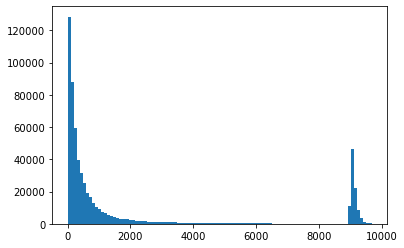

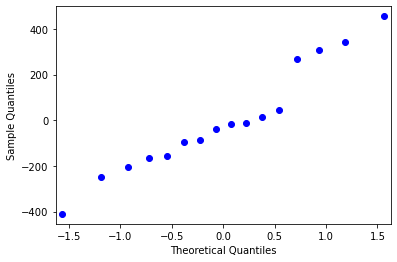

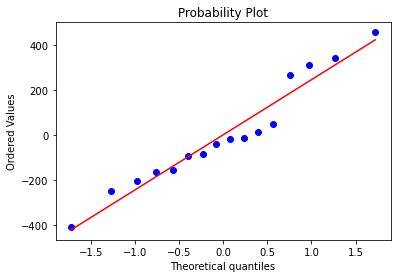

In [42]:
norm_hist_qq_test(parceldf, parceldf.Minor, 100)

In [5]:
def hscdty_brpa_test (indep, dep, fsm_df, fsm_results):
    
    #Produces visual scatter graph
    y = fsm_df[f"Predicted {dep}"]
    y_hat = fsm_results.predict()
    fig, ax = plt.subplots()
    ax.set(xlabel=f"{dep}",
        ylabel=f"Residuals (Actual - Predicted {dep})")
    ax.scatter(x=y_hat, y=y-y_hat, color="blue", alpha=0.2);
    
    #Breusch-Pagan Test:
    lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[[f"{indep}"]])
    print("Lagrange Multiplier p-value:", lm_p_value)
    print("F-statistic p-value:", f_p_value) 

Find median for Price Sale in rpsdf

use a n of 27000 roughly the size of our data

find three stds away and what points those are on our min and max see if that would be a good indicator middle class

In [45]:
rpsdf.SalePrice.median()

153000.0

In [56]:
itest=test.astype(int)

In [58]:
def zscore(s):
    return (s - np.mean(s)) / np.std(s)

In [68]:
test_zscore = zscore(test)
len(test_zscore)

27000

In [74]:

bank = []
for x in test_zscore:
    if 2>x>-2:
        bank.append(x)
len(bank)
#1193 outliers

25807

In [77]:
mean = np.mean(rpsdf.SalePrice, axis=0)
sd = np.std(rpsdf.SalePrice, axis=0)

final_list = [x for x in rpsdf.SalePrice if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NameError: name 'show' is not defined

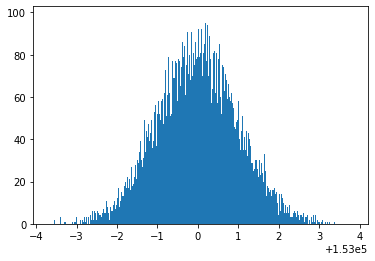

In [50]:
plt.hist(test, bins=1000)
show.plt()

In [ ]:
mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]

In [78]:
def outlier_remover (dataframe, column, n):
df=pd.DataFrame({'Data':np.random.normal(size=len(column))})  #example 
df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standarddeviations in the column 'Data'.
df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or the other way around

,Data
0,0.143765
1,0.028389
2,-0.085735
3,0.880665
4,-1.728095
...,...
195,-2.054320
196,-0.994928
197,1.117950
198,0.743388


In [86]:
f = 'SalePrice~SqFtTotLiving'
model = ols(formula=f, data=all_residential)
results = model.fit()

results.summary()

NameError: name 'all_residential' is not defined

In [30]:
rps_parcel_dfmerge = pd.merge(rpsdf, parceldf,  how='left', left_on=['Major','Minor'], right_on = ['Major','Minor'])
rps_parcel_resbld_dfmerge = pd.merge(rps_parcel_dfmerge, rbdf, how='left', left_on=['Major', 'Minor'], right_on=['Major','Minor'])

In [31]:
rps_parcel_resbld_dfmerge.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2671216,98400,380,04/02/2014,0,20140602000186,,,,,...,1.0,0.0,1.0,1967.0,0.0,0.0,0.0,0.0,4.0,0.0
1,2201052,889980,280,03/03/2006,0,20060420001615,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2548641,330395,1610,06/07/2012,335000,20120615000867,,,,,...,1.0,0.0,0.0,1994.0,0.0,0.0,0.0,0.0,3.0,4500.0
3,1598443,675260,940,03/06/1998,209950,199803122092,165,041,675260,P,...,0.0,0.0,0.0,1995.0,0.0,0.0,0.0,0.0,3.0,3260.0
4,2339550,795508,170,03/28/2008,0,20080331002272,,,,,...,0.0,0.0,0.0,1982.0,0.0,0.0,0.0,0.0,4.0,0.0


In [90]:
all_sales_2019_merged = all_merge[(all_merge.SalePrice > 50000) & (all_merge.DocumentDate > '2019') & (all_merge.DocumentDate < '2020')].sort_values("DocumentDate")
all_sales_2019_merged.head()

NameError: name 'all_merge' is not defined

In [103]:
all_residential = all_sales_merged[(all_sales_merged.PropType == 'R')]
all_residential[(all_residential.PrincipalUse == 0) & (all_residential.Bedrooms == 0)]
all_residential[all_residential.SqFtTotLiving == 0]
all_residential[(all_residential.PropertyType == 1)]


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost


In [106]:
q1testdf=all_sales_2019_merged[['SalePrice', 'SqFtTotLiving']]
q1testdf.dropna()
q1testdf.shape

(0, 2)

In [97]:
#df=pd.DataFrame({'Data':np.random.normal(size=len(column))})  #example 
wk = q1testdf[np.abs(q1testdf.SalePrice-q1testdf.SalePrice.mean())<=(2*q1testdf.SalePrice.std())] #keep only the ones that are within +3 to -3 standarddeviations in the column 'Data'.
#df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] 

In [98]:
wk.shape

(998192, 2)

In [99]:
print(wk.SalePrice.max())
print(wk.SalePrice.min())

3250000
1


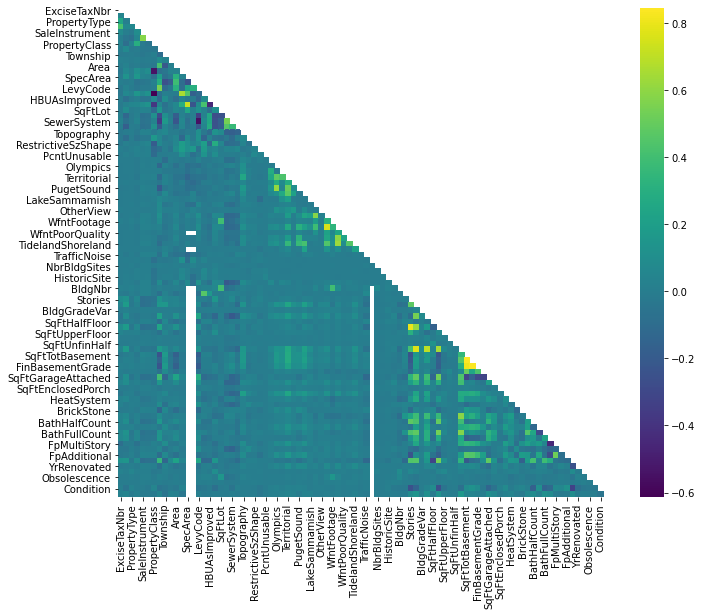

In [126]:
corr = all_merge.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [124]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [19]:
# Create correlation matrix
corr_matrix = rps_parcel_resbld_dfmerge.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#Find index of feature columns with correlation less than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.1)]

In [152]:
to_drop

['PropertyType',
 'PrincipalUse',
 'SaleReason',
 'PropertyClass',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'LevyCode',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'AirportNoise',
 'CurrentUseDesignation',
 'BldgNbr',
 'NbrLivingUnits',
 'Stories',
 'BldgGrade',
 'SqFt1stFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'SqFtOpenPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'Bedrooms',
 'BathHa

In [146]:
sale_preds = rps_parcel_resbld_dfmerge[['SqFtTotLiving',
                        'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'SaleReason',
 'PropertyClass',
 'Range',
 'Township',
 'Section',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'LevyCode',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'AirportNoise',
 'NbrBldgSites',
 'Contamination',
 'HistoricSite',
 'CurrentUseDesignation',
 'BldgNbr',
 'NbrLivingUnits',
 'Stories',
 'BldgGrade',
 'BldgGradeVar',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'FpSingleStory',
 'FpMultiStory',
 'FpFreestanding',
 'FpAdditional',
 'YrBuilt',
 'YrRenovated',
 'PcntComplete',
 'Obsolescence',
 'PcntNetCondition',
 'Condition',
 'AddnlCost']]

model = sm.OLS(all_merge.SalePrice, sm.add_constant(sale_preds))
results = model.fit()

results.summary()

MissingDataError: exog contains inf or nans

In [20]:
dftest = rps_parcel_resbld_dfmerge[['SqFtTotLiving',
                        'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'SaleReason',
 'PropertyClass',
 'Range',
 'Township',
 'Section',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'LevyCode',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'TidelandShoreland',
 'LotDepthFactor',
 'TrafficNoise',
 'AirportNoise',
 'NbrBldgSites',
 'Contamination',
 'HistoricSite',
 'CurrentUseDesignation',
 'BldgNbr',
 'NbrLivingUnits',
 'Stories',
 'BldgGrade',
 'BldgGradeVar',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtUnfinFull',
 'SqFtUnfinHalf',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'FinBasementGrade',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'HeatSystem',
 'HeatSource',
 'BrickStone',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'FpSingleStory',
 'FpMultiStory',
 'FpFreestanding',
 'FpAdditional',
 'YrBuilt',
 'YrRenovated',
 'PcntComplete',
 'Obsolescence',
 'PcntNetCondition',
 'Condition',
 'AddnlCost']]

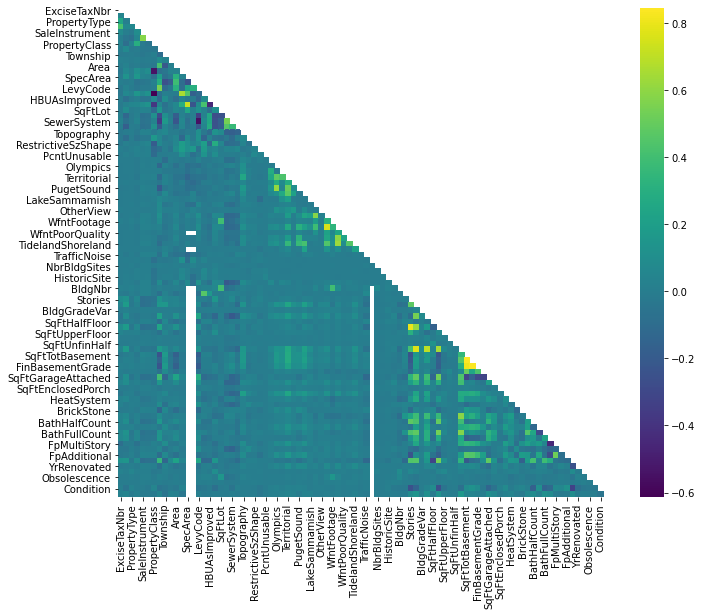

In [22]:
corr = rps_parcel_resbld_dfmerge.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [ ]:
def remove_outlier(df, col_name):
    threshold = .1  # Anything that occurs abovethan this will be removed.
    value_counts = corr.stack().value_counts()  # Entire DataFrame
    to_remove = value_counts[value_counts <= threshold].index
    if(len(to_remove) > 0):
        df[col_name].replace(to_remove, np.nan)
    return df

df = df[df[col_name] < threshold]

We need to find out what corralates with sales price, that doesnt corralate with each other

In [117]:
newdf = rps_parcel_resbld_dfmerge[['DocumentDate','SalePrice','SaleInstrument','SubArea','HBUAsIfVacant','BldgNbr','Stories','BldgGrade','BldgGradeVar','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving',
 'SqFtTotBasement','SqFtFinBasement','FinBasementGrade','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount','WfntFootage','SqFtOpenPorch','SqFtEnclosedPorch','WfntLocation']]

In [118]:
newdf['DocumentDate'] = pd.to_datetime(newdf.DocumentDate)
newdf = newdf[(newdf.SalePrice > 50000) & (newdf.DocumentDate > '2019') & (newdf.DocumentDate < '2020') & (newdf.SalePrice < 1500000)]

<ipython-input-118-813650db42d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['DocumentDate'] = pd.to_datetime(newdf.DocumentDate)


In [125]:
#dropping SpecArea as it has 2079256 nans, it has a len of 2126260
newdf.isna().sum()

DocumentDate         0
SalePrice            0
SaleInstrument       0
SubArea              0
HBUAsIfVacant        0
BldgNbr              0
Stories              0
BldgGrade            0
BldgGradeVar         0
SqFt1stFloor         0
SqFt2ndFloor         0
SqFtTotLiving        0
SqFtTotBasement      0
SqFtFinBasement      0
FinBasementGrade     0
Bedrooms             0
BathHalfCount        0
Bath3qtrCount        0
BathFullCount        0
WfntFootage          0
SqFtOpenPorch        0
SqFtEnclosedPorch    0
WfntLocation         0
dtype: int64

In [122]:
newdf.dropna(inplace=True)

In [124]:
len(newdf)

26600

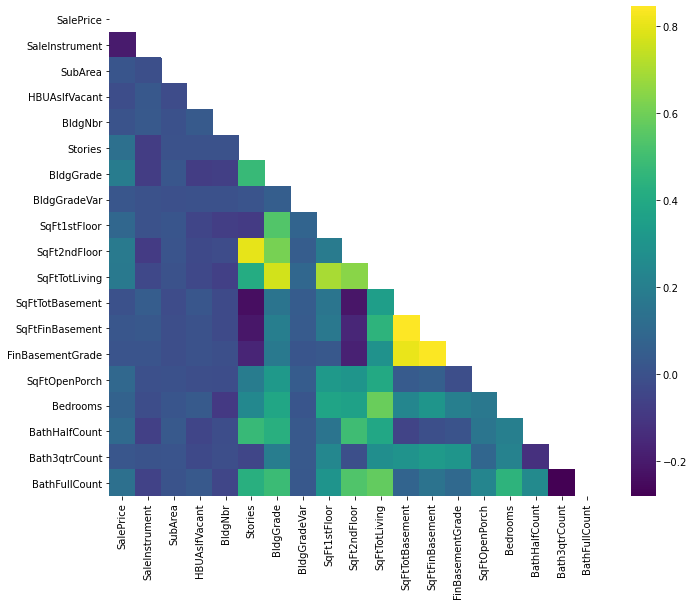

In [46]:
corr = newdf.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [66]:
# fsm = ols(formula="dep ~ indep", data=newdf)
 #   fsm_results = fsm.fit()
  #  return fsm_results.summary()

model_3 = ols(formula="SalePrice ~ SaleInstrument + SubArea + HBUAsIfVacant + BldgNbr + Stories + BldgGrade + BldgGradeVar + SqFt1stFloor + SqFt2ndFloor + SqFtTotLiving + SqFtTotBasement + SqFtFinBasement + FinBasementGrade + SqFtOpenPorch + Bedrooms + BathHalfCount + Bath3qtrCount + BathFullCount", data=newdf)
model_3_results = model_3.fit()


In [67]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:12:19   Log-Likelihood:            -3.6893e+05
No. Observations:               26853   AIC:                         7.379e+05
Df Residuals:                   26835   BIC:                         7.380e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.112e+05   1.51e+04    -14.016      0.000   -2.41e+05   -1.82e+05
SaleInstrument   -1.372e+04    326.152    -42.054      0.000   -1.44e+04   -1.31e+04
SubArea          -3684.9589    336.142    -10.963      0.000   -4343.814   -3026.103
HBUAsIfVacant     8849.5683   1502.505      5.890      0.000    5904.580    1.18e+04
BldgNbr           1.869e+04   2338.896      7.990      0.000    1.41e+04    2.33e+04
Stories          -6588.6148   5810.930     -1.134      0.257    -1.8e+04    4801.112
BldgGrade         1.066e+05   2079.036     51.290      0.000    1.03e+05    1.11e+05
BldgGradeVar      4.562e-10   3.28e-11     13.920      0.000    3.92e-10     5.2e-10
SqFt1stFloor      -181.8140     10.864    -16.735      0.000    -203.108    -160.520
SqFt2ndFloor      -131.1615      8.185    -16.025      0.000    -147.204    -115.119
SqFtTotLiving      259.6886      9.709     26.747      0.000     240.659     278.719
SqFtTotBasement     90.2435      5.199     17.359      0.000      80.054     100.433
SqFtFinBasement   -205.4043     11.899    -17.262      0.000    -228.727    -182.081
FinBasementGrade  2967.6180    828.834      3.580      0.000    1343.060    4592.176
SqFtOpenPorch       38.9314     13.843      2.812      0.005      11.798      66.065
Bedrooms         -2.694e+04   2014.905    -13.373      0.000   -3.09e+04    -2.3e+04
BathHalfCount    -3.548e+04   3241.723    -10.944      0.000   -4.18e+04   -2.91e+04
Bath3qtrCount     7803.8216   3116.571      2.504      0.012    1695.179    1.39e+04
BathFullCount    -5156.4078   3325.624     -1.551      0.121   -1.17e+04    1361.989
==============================================================================
Omnibus:                     1230.423   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2175.598
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                       4.180   Cond. No.                     1.78e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
newdf.corr()
#stories and builidng grade, sqft 1st floor, sqft2nd floor, sqft total living, bathhalfcount, bathfullcount
#bldg grade and sqft 1st floor, sqft 2nd floor, sqft total living, sqftopenporcch, bedrooms, half bath count, bath 3qtr count, bath full count

,SalePrice,SaleInstrument,SubArea,HBUAsIfVacant,BldgNbr,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtOpenPorch,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount
SalePrice,1.000000,-0.227351,-0.036395,-0.000105,-0.074017,0.286924,0.547517,NaN,0.225681,0.338236,0.499517,0.188068,0.190175,0.182170,0.198987,0.265101,0.148593,0.166166,0.283488
SaleInstrument,-0.227351,1.000000,0.007088,-0.009351,0.195236,-0.039195,-0.084721,NaN,0.015167,-0.012972,-0.011163,-0.006743,-0.016994,-0.032265,0.010535,-0.033247,-0.036637,-0.025409,-0.029626
SubArea,-0.036395,0.007088,1.000000,-0.011457,-0.026527,-0.022245,0.044534,NaN,0.064099,0.008805,0.038342,-0.003936,0.001984,-0.014403,0.002196,0.028750,0.042011,-0.004783,0.019006
HBUAsIfVacant,-0.000105,-0.009351,-0.011457,1.000000,0.004746,0.013602,-0.070212,NaN,-0.061880,-0.041781,-0.054931,0.023730,0.001286,0.011763,-0.020930,-0.011041,-0.048250,-0.009598,-0.006824
BldgNbr,-0.074017,0.195236,-0.026527,0.004746,1.000000,-0.017583,-0.158777,NaN,-0.105971,-0.039018,-0.104508,-0.038356,-0.035828,-0.027136,-0.022356,-0.179062,-0.041141,-0.039546,-0.093053
Stories,0.286924,-0.039195,-0.022245,0.013602,-0.017583,1.000000,0.502699,NaN,-0.253132,0.754871,0.360585,-0.310107,-0.277800,-0.151873,0.200820,0.189064,0.414831,-0.014068,0.378777
BldgGrade,0.547517,-0.084721,0.044534,-0.070212,-0.158777,0.502699,1.000000,NaN,0.341749,0.584562,0.670705,0.027199,0.068385,0.104697,0.271320,0.385232,0.357497,0.155003,0.442210
BldgGradeVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SqFt1stFloor,0.225681,0.015167,0.064099,-0.061880,-0.105971,-0.253132,0.341749,NaN,1.000000,0.077409,0.615098,0.076260,0.081405,-0.116597,0.259090,0.404568,0.023382,0.146163,0.242568
SqFt2ndFloor,0.338236,-0.012972,0.008805,-0.041781,-0.039018,0.754871,0.584562,NaN,0.077409,1.000000,0.654860,-0.325422,-0.264078,-0.240477,0.378396,0.402828,0.418917,-0.026396,0.540431


In [126]:
model_3 = ols(formula="SalePrice ~ BldgGrade + SubArea + HBUAsIfVacant + SqFtTotLiving + SqFtTotBasement + FinBasementGrade + SqFtOpenPorch + Bath3qtrCount + BathFullCount + WfntFootage + SqFtOpenPorch + SqFtEnclosedPorch + WfntLocation", data=newdf)
model_3_results = model_3.fit()

In [127]:
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     1344.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:53:59   Log-Likelihood:            -3.6570e+05
No. Observations:               26600   AIC:                         7.314e+05
Df Residuals:                   26587   BIC:                         7.315e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.824e+05   1.22e+04    -31.342      0.000   -4.06e+05   -3.58e+05
BldgGrade          1.179e+05   1904.199     61.916      0.000    1.14e+05    1.22e+05
SubArea           -4572.3326    339.714    -13.459      0.000   -5238.189   -3906.476
HBUAsIfVacant      1.135e+04   1513.979      7.496      0.000    8380.968    1.43e+04
SqFtTotLiving        65.5576      2.980     21.999      0.000      59.717      71.399
SqFtTotBasement      75.5741      4.451     16.980      0.000      66.850      84.298
FinBasementGrade   -552.9546    677.705     -0.816      0.415   -1881.293     775.384
SqFtOpenPorch        72.2024     13.936      5.181      0.000      44.887      99.518
Bath3qtrCount      1.405e+04   2862.678      4.908      0.000    8439.523    1.97e+04
BathFullCount     -2078.0085   3095.102     -0.671      0.502   -8144.573    3988.557
WfntFootage         -15.2393      6.489     -2.348      0.019     -27.959      -2.520
SqFtEnclosedPorch   111.0324     43.572      2.548      0.011      25.629     196.436
WfntLocation       9033.7118   1939.869      4.657      0.000    5231.465    1.28e+04
==============================================================================
Omnibus:                     1254.959   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1834.562
Skew:                           0.438   Prob(JB):                         0.00
Kurtosis:                       3.941   Cond. No.                     2.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model_3_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9484839946626334
Rainbow p-value: 0.9988513753055951


In [ ]:
testskl = sklearn.preprocessing.OneHotEncoder()

In [139]:
rows = newdf[['DocumentDate','SalePrice','SaleInstrument','SubArea','HBUAsIfVacant','BldgNbr','Stories','BldgGrade','BldgGradeVar','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving','SqFtTotBasement','SqFtFinBasement','FinBasementGrade','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount','WfntFootage','SqFtOpenPorch','SqFtEnclosedPorch','WfntLocation']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(23)]
vif_df["feature"] = ['DocumentDate','SalePrice','SaleInstrument','SubArea','HBUAsIfVacant','BldgNbr','Stories','BldgGrade','BldgGradeVar','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving','SqFtTotBasement','SqFtFinBasement','FinBasementGrade','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount','WfntFootage','SqFtOpenPorch','SqFtEnclosedPorch','WfntLocation']
vif_df

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [134]:
bank = ['DocumentDate','SalePrice','SaleInstrument','SubArea','HBUAsIfVacant','BldgNbr','Stories','BldgGrade','BldgGradeVar','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving',
 'SqFtTotBasement','SqFtFinBasement','FinBasementGrade','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount','WfntFootage','SqFtOpenPorch','SqFtEnclosedPorch','WfntLocation']

In [135]:
len(bank)

23

ONE HOT ENCODER

Building Grade 82

Finished Basement Grade 82

HBUasavacant 103

Waterfront Location 50 - done

In [196]:
lookup(50)

,LUType,LUItem,LUDescription
964,50,1,DUWAMISH ...
965,50,2,ELLIOTT BAY ...
966,50,3,PUGET SOUND ...
967,50,4,LAKE UNION ...
968,50,5,SHIP CANAL ...
969,50,6,LAKE WASH ...
970,50,7,LAKE SAMM ...
971,50,8,OTHER LAKE ...
972,50,9,RIVER/SLOUGH ...


In [197]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe_wfnt = pd.DataFrame(ohe.fit_transform(newdf[['WfntLocation']]), index=newdf.index, columns=['Duwamish','Elliot Bay','Puget Sound','Lake Union','Ship Canal','Lake Washington','Lake Sammamish','Other Lakes','River/Slough'])

In [198]:
ohe_wfnt.columns = list(ohe.categories_[0])

In [199]:
ohe_wfnt.drop(0.0, axis=1, inplace=True)

In [148]:
ohe_bldgr = pd.DataFrame(ohe.fit_transform(newdf[['BldgGrade']]), index=newdf.index)

In [149]:
ohe_bldgr.columns = list(ohe.categories_[0])

In [150]:
ohe_bldgr.drop(0.0, axis=1, inplace=True)

KeyError: '[0.] not found in axis'

In [151]:
ohe_finbsgr = pd.DataFrame(ohe.fit_transform(newdf[['FinBasementGrade']]), index=newdf.index)

In [154]:
ohe_finbsgr.columns = list(ohe.categories_[0])

In [155]:
ohe_finbsgr.drop(0.0, axis=1, inplace=True)

In [158]:
ohe_hbuva = pd.DataFrame(ohe.fit_transform(newdf[['HBUAsIfVacant']]), index=newdf.index)

In [159]:
ohe_hbuva.columns = list(ohe.categories_[0])

In [160]:
ohe_hbuva.drop(0.0, axis=1, inplace=True)

In [191]:
lookup(103)

,LUType,LUItem,LUDescription
213,103,1,SINGLE FAMILY ...
214,103,10,AMUSEMENT/ENTERTAINMENT ...
215,103,11,CULTURAL ...
216,103,12,EDUCATIONAL SERVICE ...
217,103,13,COMMERCIAL SERVICE ...
218,103,14,RETAIL/WHOLESALE ...
219,103,15,MANUFACTURING ...
220,103,16,AGRICULTURAL ...
221,103,17,FORESTRY ...
222,103,18,FISH & WILDLIFE MGMT ...


In [192]:
ohe_hbuva = ohe_hbuva.rename(columns={
    '1.0': 'HBUV_Single_Family_Home',
    '6.0': 'HBUV_Multi_Family_Dwelling',
    '9.0': 'HBUV_Park_Rec',
    '13.0': 'HBUV_Commercial_Services',
    '15.0': 'HBUV_Manufacturing',
    '16.0': 'HBUV_Agricultural',
    '21.0': 'HBUV_Mixed_Use',
}, inplace=True)

SCALING

In [166]:
ss = StandardScaler()
# do this with continous variables
ss_df = pd.DataFrame(ss.fit_transform(newdf[['SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving','SqFtTotBasement','SqFtFinBasement','WfntFootage','SqFtOpenPorch','SqFtEnclosedPorch']]),index=newdf.index, columns=['SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving','SqFtTotBasement','SqFtFinBasement','WfntFootage','SqFtOpenPorch','SqFtEnclosedPorch'])

In [167]:
ss_df

,SqFt1stFloor,SqFt2ndFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,WfntFootage,SqFtOpenPorch,SqFtEnclosedPorch
86,-0.157158,-0.805600,-0.359199,1.092450,0.847533,-0.052929,-0.638419,-0.1702
216,-1.860248,0.028956,-0.598429,-0.806506,-0.659293,-0.052929,-0.638419,-0.1702
354,0.395794,2.146256,1.482868,-0.806506,-0.659293,-0.052929,-0.638419,-0.1702
499,2.076766,3.475364,3.420627,-0.806506,-0.659293,-0.052929,2.054630,-0.1702
554,-1.395769,0.137139,-0.622352,0.225936,0.191335,-0.052929,-0.638419,-0.1702
...,...,...,...,...,...,...,...,...
2126029,0.285203,-0.805600,1.016371,0.760594,1.406517,-0.052929,-0.638419,-0.1702
2126202,1.169926,-0.805600,1.004409,1.332124,2.159930,-0.052929,1.426252,-0.1702
2126206,-1.086116,-0.805600,-1.005119,0.520920,0.555889,-0.052929,-0.638419,-0.1702
2126248,0.064023,1.018060,0.430258,-0.806506,-0.659293,-0.052929,-0.279346,-0.1702
